In [143]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch 

In [144]:
# reading the data
data = pd.read_csv('../data/raw/beer_reviews.csv')

In [145]:
# Data preprocessing

data.head()

brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

In [146]:
# Number of rows and columns
data.shape


(1586614, 13)

In [147]:
# printing number of unique values in each column
for i in data.columns:
    print(i, data[i].nunique())

brewery_id 5840
brewery_name 5742
review_time 1577960
review_overall 10
review_aroma 9
review_appearance 10
review_profilename 33387
beer_style 104
review_palate 9
review_taste 9
beer_name 56857
beer_abv 530
beer_beerid 66055


In [148]:
# dropping the unnecessary columns

data.drop(['brewery_id','review_time','review_profilename','beer_beerid'],axis=1,inplace=True)

In [149]:
data.head()

brewery_name  review_overall  review_aroma  review_appearance  \
0          Vecchio Birraio             1.5           2.0                2.5   
1          Vecchio Birraio             3.0           2.5                3.0   
2          Vecchio Birraio             3.0           2.5                3.0   
3          Vecchio Birraio             3.0           3.0                3.5   
4  Caldera Brewing Company             4.0           4.5                4.0   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  
0            Sausa Weizen       5.0  
1                Red Moon       6.2  
2  Black Horse Black Beer       6.5  
3              Sausa Pils       5.0  
4           Cauldron DIPA       7.7

In [150]:
# Dropping review_overall

data.drop(['review_overall'],axis=1,inplace=True)

In [151]:
data.head()

brewery_name  review_aroma  review_appearance  \
0          Vecchio Birraio           2.0                2.5   
1          Vecchio Birraio           2.5                3.0   
2          Vecchio Birraio           2.5                3.0   
3          Vecchio Birraio           3.0                3.5   
4  Caldera Brewing Company           4.5                4.0   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  
0            Sausa Weizen       5.0  
1                Red Moon       6.2  
2  Black Horse Black Beer       6.5  
3              Sausa Pils       5.0  
4           Cauldron DIPA       7.7

In [152]:
# Let's analyse the data 

In [153]:
# unique values in brewery_name

data['brewery_name'].unique()

array(['Vecchio Birraio', 'Caldera Brewing Company',
       'Amstel Brouwerij B. V.', ..., 'Wissey Valley Brewery',
       'Outback Brewery Pty Ltd', 'Georg Meinel Bierbrauerei KG'],
      dtype=object)

In [154]:
# platte options boxplot sns are colorblind friendly 
# https://seaborn.pydata.org/tutorial/color_palettes.html

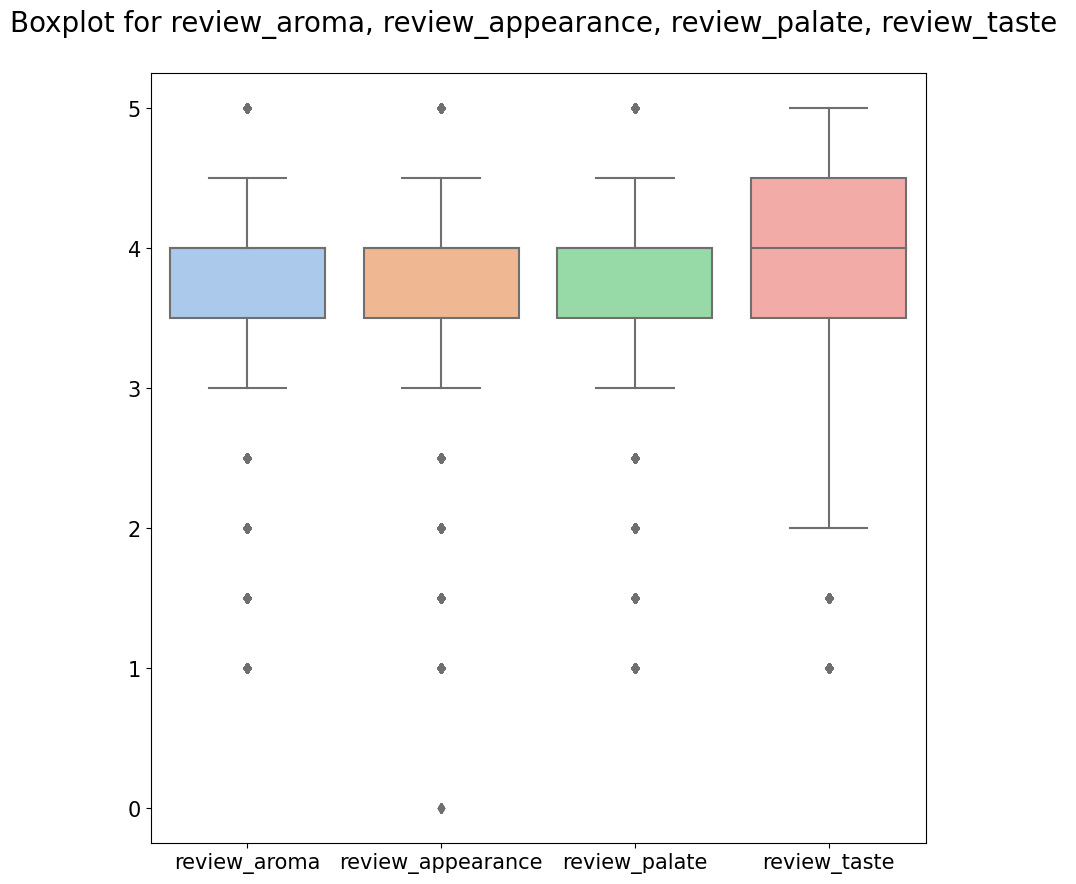

In [155]:
# boxplot for beer_abv review_aroma review_appearance review_palate review_taste with colour platte similar to orange


plt.figure(figsize=(10,10))
sns.boxplot(data=data[['review_aroma','review_appearance','review_palate','review_taste']], palette='pastel')
# adding title to the plot
plt.title('Boxplot for review_aroma, review_appearance, review_palate, review_taste \n', fontsize=20)
# increasing the font size of x and y ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

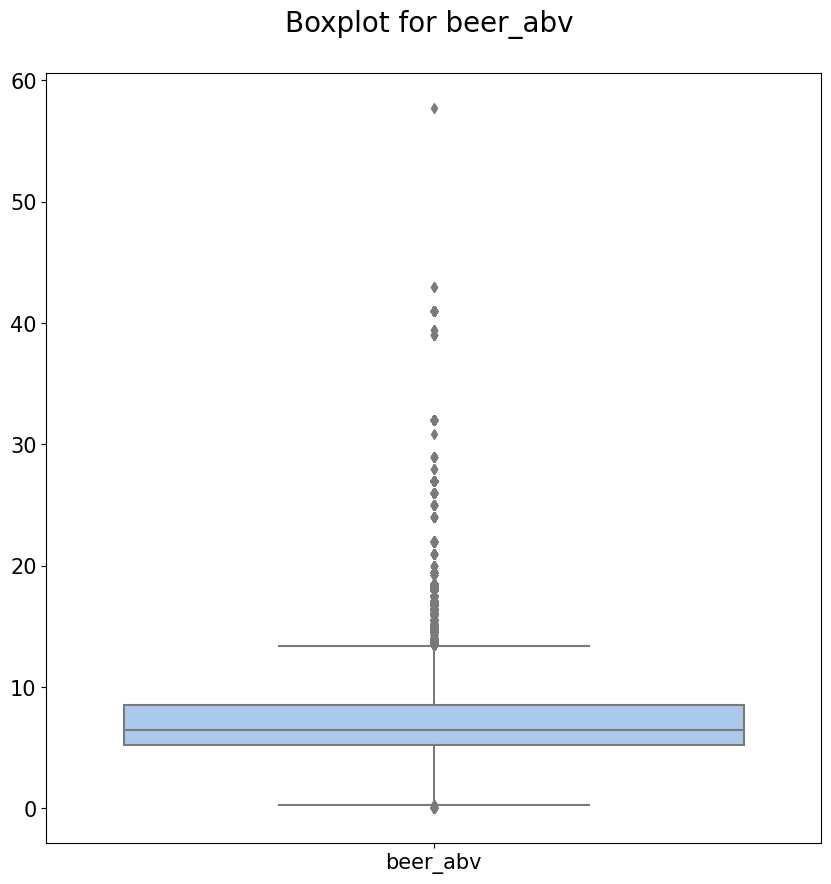

In [156]:
# Boxplot for beer_abv

plt.figure(figsize=(10,10))

sns.boxplot(data=data[['beer_abv']], palette='pastel')

plt.title('Boxplot for beer_abv \n', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [157]:
# Group by brewery_name and finding the count of each brewery_name and sorting them in descending order

data.groupby('brewery_name')['beer_name'].count().sort_values(ascending=False)



brewery_name
Boston Beer Company (Samuel Adams)    39444
Dogfish Head Brewery                  33839
Stone Brewing Co.                     33066
Sierra Nevada Brewing Co.             28751
Bell's Brewery, Inc.                  25191
                                      ...  
Science Infuse                            1
Bir&#371; Alus                           1
Birrificio Valscura                       1
Calwer-Eck-Bräu GmbH & Co. KG             1
Łódzkie Browary S.A.                      1
Name: beer_name, Length: 5742, dtype: int64

In [158]:
data.groupby('brewery_name')['beer_name'].count().sort_values(ascending=True)

brewery_name
Łódzkie Browary S.A.                      1
Brasserie Alauna                          1
Gio'Bi                                    1
Giessener Brauhaus                        1
Brasserie Artisanale De L'Ermitage        1
                                      ...  
Bell's Brewery, Inc.                  25191
Sierra Nevada Brewing Co.             28751
Stone Brewing Co.                     33066
Dogfish Head Brewery                  33839
Boston Beer Company (Samuel Adams)    39444
Name: beer_name, Length: 5742, dtype: int64

<Axes: >

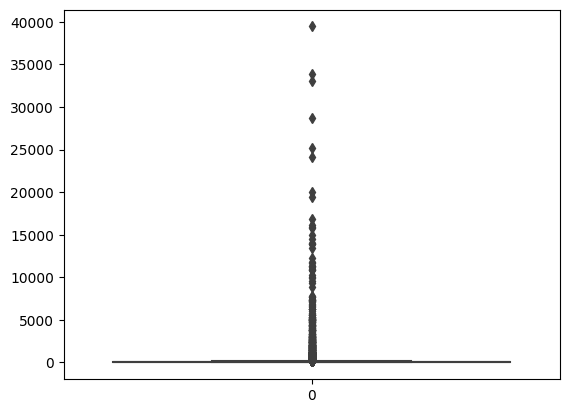

In [159]:
#brewery_name for beers 

num_beers_by_brewery = data.groupby('brewery_name')['beer_name'].count()

# plotting the boxplot for num_beers_by_brewery

sns.boxplot(num_beers_by_brewery)


C:\Users\Rajat\AppData\Local\Temp\ipykernel_30260\481146168.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_beers_by_brewery)


<Axes: xlabel='beer_name', ylabel='Density'>

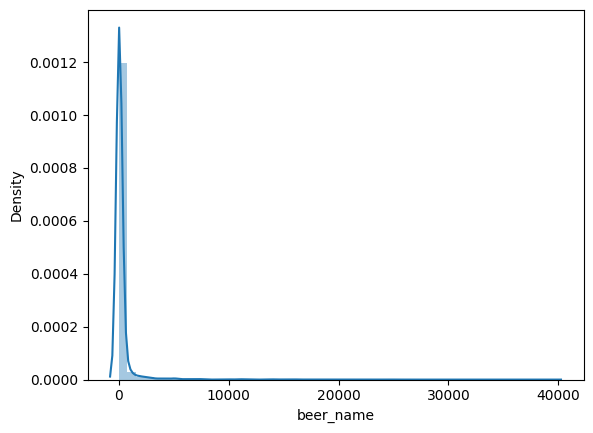

In [160]:
# Plotting the distribution plot for num_beers_by_brewery

sns.distplot(num_beers_by_brewery)

In [161]:
# Group by beer_style and finding the count of each beer_style and sorting them in descending order

data.groupby('beer_style')['beer_name'].count().sort_values(ascending=False)

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
                                     ...  
Gose                                   686
Faro                                   609
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_name, Length: 104, dtype: int64

In [162]:
# Group by beer_name and finding the count of each beer_style and sorting them in descending order

data.groupby('beer_name')['beer_style'].count().sort_values(ascending=False)

beer_name
90 Minute IPA                          3290
India Pale Ale                         3130
Old Rasputin Russian Imperial Stout    3111
Sierra Nevada Celebration Ale          3000
Two Hearted Ale                        2728
                                       ... 
Krug-Bräu Pilsner                         1
Krug-Bräu Festbier                        1
Krug Premium                              1
Kross Maibock                             1
葉山ビール (Hayama Beer)                       1
Name: beer_style, Length: 56857, dtype: int64

C:\Users\Rajat\AppData\Local\Temp\ipykernel_30260\4179033940.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.groupby('beer_name')['beer_style'].count())


<Axes: xlabel='beer_style', ylabel='Density'>

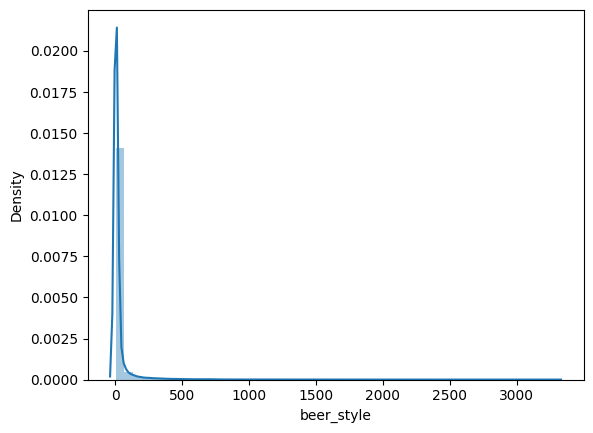

In [163]:
# Plotting the distribution plot for beer_abv

sns.distplot(data.groupby('beer_name')['beer_style'].count())


<Axes: >

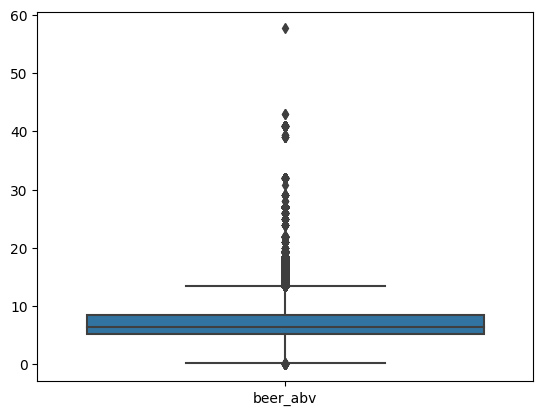

In [164]:
# beer_abv for beers

#plotting the boxplot for beer_abv  

sns.boxplot(data=data[['beer_abv']])